FileNotFoundError: [Errno 2] No such file or directory: './output_plots_by_model_SR_Benefit/TensorFlow_confusion_matrix.png'

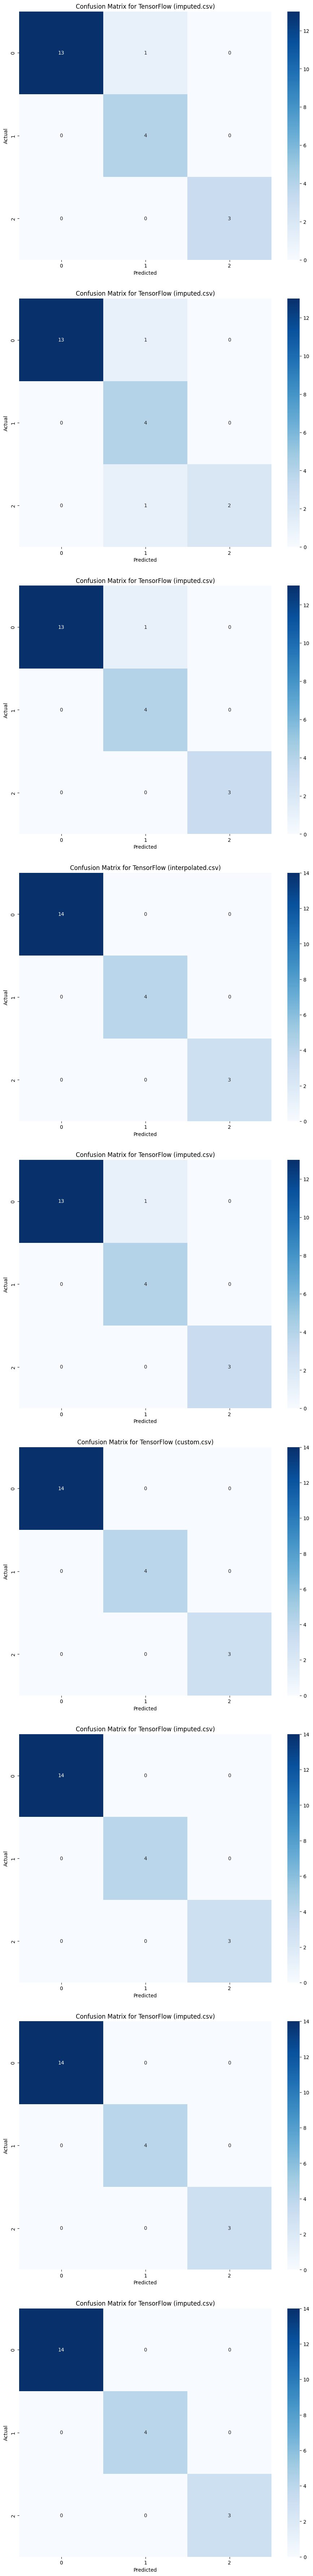

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Directory containing the output CSV files
output_csv_directory = './SR_Benefit/'
# Directory to save the plots
output_plots_directory = './output_plots_by_model_SR_Benefit/'
os.makedirs(output_plots_directory, exist_ok=True)

# Read all the CSV files in the directory
csv_files = glob.glob(os.path.join(output_csv_directory, '*.csv'))

# Dictionary to store data for each model
model_data_dict = {}

# Read each CSV file and store the data by model
for csv_file in csv_files:
    data = pd.read_csv(csv_file)
    for model in data['Model'].unique():
        if model not in model_data_dict:
            model_data_dict[model] = []
        model_data_dict[model].append((data[data['Model'] == model], os.path.basename(csv_file)))

# Function to extract the relevant part of the filename for the title
def extract_title_part(filename):
    return filename.split('_')[-3]  # Adjust the split index based on the filename format

# Function to plot confusion matrix for each model
def plot_confusion_matrix(model_name, model_data_list):
    num_plots = len(model_data_list)
    fig, axes = plt.subplots(num_plots, 1, figsize=(10, 8 * num_plots))  # Adjust figure size
    
    for i, (model_data, csv_filename) in enumerate(model_data_list):
        actual = model_data['Actual']
        predicted = model_data['Predicted']
        cm = confusion_matrix(actual, predicted, labels=[0, 1, 2])
        
        if num_plots == 1:
            ax = axes
        else:
            ax = axes[i]
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2], ax=ax)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        title_part = extract_title_part(csv_filename)
        ax.set_title(f'Confusion Matrix for {model_name} ({title_part})')

    plt.tight_layout(pad=3.0)  # Increase padding between subplots
    plot_filename = os.path.join(output_plots_directory, f"{model_name}_confusion_matrix.png")
    plt.savefig(plot_filename)
    plt.close()

# Plot and save confusion matrices for each model
for model_name, model_data_list in model_data_dict.items():
    plot_confusion_matrix(model_name, model_data_list)

print("Confusion matrices saved to output_plots_by_model")
